In [2]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from lib import *

In [2]:
dfepitope = pd.read_csv('/home/amayer/data/peptidome/allhuman-iedb-epitopes.csv', header=1, usecols=(2, 9, 14))
dfepitope = dfepitope.fillna('')

In [5]:
dfepitope = load_iedb_tcellepitopes(only_standard_amino_acids=False)

                      Reference                                     \
                      Assay IRI                      Reference IRI   
0  http://www.iedb.org/assay/29  http://www.iedb.org/reference/274   
1  http://www.iedb.org/assay/37  http://www.iedb.org/reference/281   
2  http://www.iedb.org/assay/42  http://www.iedb.org/reference/283   
3  http://www.iedb.org/assay/43  http://www.iedb.org/reference/283   
4  http://www.iedb.org/assay/47  http://www.iedb.org/reference/275   

                                                                              \
         Type   PubMed ID                                            Authors   
0  Literature  15448372.0  Yi-Hsiang Huang; Mi-Hua Tao; Cheng-po Hu; Wan-...   
1  Literature   7684468.0  V J La Posta; D D Auperin; R Kamin-Lewis; G A ...   
2  Literature  15634878.0    Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh   
3  Literature  15634878.0    Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh   
4  Literature  15519708.0  Ol

In [11]:
epi = dfepitope[('Epitope', 'Description')]

In [17]:
k = 2
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfmouse = counter_to_df(count_kmers_proteome(mouse, k))
#epi = list(dfepitope['Description'])
dfiedb = counter_to_df(count_kmers_iterable(epi, k))

In [18]:
len(epi), 20**k

(343098, 400)

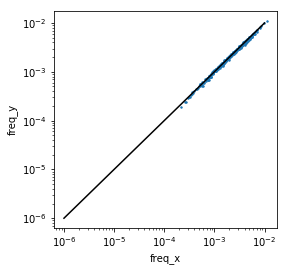

In [20]:
dfm = dfhuman.merge(dfmouse, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=2)
plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-4)
#ax.set_ylim(2e-7, 5e-4)

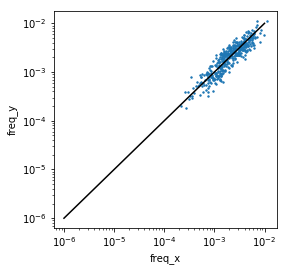

In [21]:
dfm = dfhuman.merge(dfiedb, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=2)
plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-3)
#ax.set_ylim(2e-7, 5e-3)

In [22]:
dfm['fold'] = dfm['freq_y']/dfm['freq_x']

(SpearmanrResult(correlation=-0.14052229110130193, pvalue=0.004868107539541328),
 array([[ 1.        , -0.13770183],
        [-0.13770183,  1.        ]]))

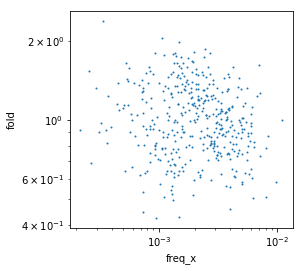

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'fold', kind='scatter', logx=True, logy=True, ax=ax, s=1)
#plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-4)
#ax.set_ylim(2e-7, 5e-4)
scipy.stats.spearmanr(dfm['freq_x'], dfm['fold']), np.corrcoef(np.log(dfm['freq_x']), np.log(dfm['fold']))

In [24]:
dfm.sort_values('fold')

,seq,freq_x,freq_y,fold
361,QC,0.000953,0.000406,0.426176
364,EC,0.001489,0.000639,0.429257
385,HC,0.000736,0.000328,0.445899
7,QE,0.004019,0.001839,0.457617
201,CR,0.001326,0.000660,0.497438
318,PP,0.006179,0.003118,0.504716
99,EE,0.007947,0.004049,0.509493
304,CQ,0.001101,0.000562,0.510539
336,SC,0.001925,0.001002,0.520545
346,CE,0.001289,0.000677,0.525310
